# Reports on Rootfinding Activities

(RootfindingActivityReport-1)=
## Rootfinding Activity 1

_Write Newton's method iterations for the following functions, and estimate the desired root(s)_.
1. $f(x) = x^2 - 3$ with $x_0 = 1$
2. $f(x) = x^3 - 2$ with $x_0 = 1$
3. Newton's original example, $f(x) = x^3 - 2x - 5 = 0$. Since $f(0) = -5$, $f(1) = -6$, $f(2) = -1$, and $f(3) = 16$, we see there is a root between $x=2$ and $x=3$.  Use that knowledge to choose your initial estimate. 

In [1]:
import numpy as np
niter = 6
x = np.zeros(niter)
residual = np.zeros(niter)

f = lambda x: x**2 - 3.0
df= lambda x: 2*x
# Human differentiation can introduce blunders and bugs, but let's hope not today

x[0] = 1.0
residual[0] = f(x[0])

for k in range(1,niter):
    x[k] = x[k-1] - residual[k-1]/df(x[k-1])
    residual[k] = f(x[k])
    
print(x)
print(residual)

[1.         2.         1.75       1.73214286 1.73205081 1.73205081]
[-2.00000000e+00  1.00000000e+00  6.25000000e-02  3.18877551e-04
  8.47267412e-09 -4.44089210e-16]


In [2]:
import numpy as np
niter = 6
x = np.zeros(niter)
residual = np.zeros(niter)

f = lambda x: x**3 - 2.0
df= lambda x: 3*x**2
# Human differentiation can introduce blunders and bugs, but let's hope not today

x[0] = 1.0
residual[0] = f(x[0])

for k in range(1,niter):
    x[k] = x[k-1] - residual[k-1]/df(x[k-1])
    residual[k] = f(x[k])
    
print(x)
print(residual)

[1.         1.33333333 1.26388889 1.25993349 1.25992105 1.25992105]
[-1.00000000e+00  3.70370370e-01  1.89552255e-02  5.92593227e-05
  5.85258508e-10  0.00000000e+00]


In [3]:
import numpy as np
niter = 6
x = np.zeros(niter)
residual = np.zeros(niter)

f = lambda x: x**3 - 2.0*x - 5.0
df= lambda x: 3*x**2 - 2.0
# Human differentiation can introduce blunders and bugs, but let's hope not today

x[0] = 2.5  # It's between 2 and 3
residual[0] = f(x[0])

for k in range(1,niter):
    x[k] = x[k-1] - residual[k-1]/df(x[k-1])
    residual[k] = f(x[k])
    
print(x)
print(residual)

[2.5        2.1641791  2.09713536 2.09455523 2.09455148 2.09455148]
[ 5.62500000e+00  8.07945126e-01  2.88817212e-02  4.18649461e-05
  8.84021745e-11 -8.88178420e-16]


Because the residuals got very small very quickly, we are confident that all the answers are good.  They are, for sure, the exact answers of very nearby problems.

{ref}`[Go back to Activity] <RootfindingActivity-1>`

(RootfindingActivityReport-2)=
## Rootfinding Activity 2: The Railway Prankster Problem.

_Late one night, some pranksters weld a $2$cm piece of steel into a train track $2$km long, sealing the gaps meant to allow for heat expansion.  In the morning as the temperature rises, the train track expands and bows up into a perfectly circular arc. How high is the arc in the middle_?

The fun part of this problem is setting it up and drawing it.  The solution, using Newton's method, is below.  We used the symbol $R$ for the radius of the circular arc, and $s$ for the small increment in the length of the track.

```{image} ../Figures/Rootfinding/prankster.jpg
:height: 300px
:alt: Hand sketch for the Railway Prankster problem
:align: center
```

In [4]:
s = 1.0e-5
f = lambda R: np.sin((1+s)/R) - 1/R
df = lambda R: -(1 + s) / R ** 2 * np.cos((1 + s) / R) + 1 / R ** 2 # Differentiate carefully!
n = 5
Ar = [1000.0/9.0]
for k in range(n):
    nxt = Ar[k] - f(Ar[k])/df(Ar[k])
    Ar.append(nxt)
print(Ar)
print([f(rho) for rho in Ar])

[111.11111111111111, 123.86244904780746, 128.59835439622927, 129.09631810259108, 129.10118725925943, 129.10118771897493]
[-3.1503152937012446e-08, -6.973718736161261e-09, -6.092985586556021e-10, -5.843914761827218e-12, -5.516420653606247e-16, 8.673617379884035e-19]


The convergence there was a _bit_ slow; the residual was already pretty small with our initial estimate (we explain below where we got it) but Newton's method got us there in the end.  The difficulty is that the root is _nearly_ a multiple root.  We talk a little about that, in general, in the main text of this unit.

In [5]:
height = 1/(Ar[-1] + np.sqrt(Ar[-1]**2-1))
hmeters = height*1000.0
hfeet = 3280.84*height  # Feet in a kilometer
print("Height in is {} m or {} feet".format("%.2f" % hmeters, "%.2f" % hfeet))

Height in is 3.87 m or 12.71 feet


That might seem ridiculous.  Consider the related problem, where instead of bowing up in a perfect circular arc, the track bows up into two straight lines meeting in the middle, making an isosceles triangle with base $2$km long and sides $1+s$.  The height satisfies $h^2 +1 = (1+s)^2$ by Pythagoras; since $s=10^{-5}$km, we find pretty rapidly that $h = \sqrt{(1+s)^2-1} = \sqrt{2s + s^2}$ or $0.00447$km or about $14.7$ feet.

Okay, then.  Inserting one extra centimeter in a kilometer gives a height of 4.47m or 14.7 feet if we make a triangle; or 3.9 meters (12.7 feet) if it makes a semicircular arc.  This is kind of wild, but would be true if our crazed assumptions were true.  By the way, we used the height estimate from the triangle problem to give us an $R$ estimate for the circular arc problem; that $1000/9$ didn't come out of nowhere!

{ref}`[Go back to Activity] <RootfindingActivity-2>`

(RootfindingActivityReport-3)=

## Rootfinding Activity Report 3

We asked you to think of various questions about rootfinding.  Again, we did not intend for you to try to answer them just now.

What is the oldest method for finding roots of equations?  What is the best way to solve polynomials? Can you solve them analytically? _Is_ there a best way to solve them? How do you solve multivariate polynomials (more than one equation in more than one unknown)? Can you _count_ the number of solutions independently so that you know when you have found them all?  What's the difference between an equation and an identity? Can there be infinitely many solutions to a single equation? (Sure: $\sin(x)=0$ has solutions $k\pi$ for any integer $k$) Can an equation have no solutions? (Sure: $\exp(z) = 0$ has no finite solutions). Can an equation have _accumulation points_ of solutions? (An accumulation point is a place where things pile up infinitely; an example is the set $1/k$ for integers $k$, which has an accumulation point at $0$). Can we solve every polynomial equation in terms of continued fractions? Are there polynomial matrix equations, and can they be solved by Newton's method? What happens with _multiple_ roots, such as $z^2-2z+1=0$? If there are two solutions to an equation, which one is the right one? Can you find a formula for the _integer_ solutions of an equation?  

{ref}`[Go back to Activity] <RootfindingActivity-3>`

(RootfindingActivityReport-4)=

## Rootfinding Activity Report 4
Sometimes Newton iteration is "too expensive"; a cheaper alternative is the so-called _secant iteration_, which goes as follows: $z_{n+1} = z_n - f(z_n)(z_{n}-z_{n-1})/(f(z_n) - f(z_{n-1}))$. You need not one, but _two_ initial approximations for this.  Put $f(z) = z^2-2$ and start with the two initial approximations $z_0  = 1$, $z_1 = 3/2$.  Carry out several steps of this (in exact arithmetic is better).  Convert each rational $z_n$ to continued fraction form.  Discuss what you find.

In [6]:
import numpy as np
niter = 10
z = np.zeros(niter)
y = np.zeros(niter)

f = lambda t: t**2 - 2.0

z[0] = 1.0
y[0] = f(z[0])

z[1] = 1.5
y[1] = f(z[1])
for k in range(2,niter):
    z[k] = z[k-1] - y[k-1]*(z[k-1]-z[k-2])/(y[k-1]-y[k-2])
    y[k] = f(z[k])
    
print(z, y)

[1.         1.5        1.4        1.4137931  1.41421569 1.41421356
 1.41421356 1.41421356 1.41421356 1.41421356] [-1.00000000e+00  2.50000000e-01 -4.00000000e-02 -1.18906064e-03
  6.00730488e-06 -8.93145558e-10 -8.88178420e-16 -4.44089210e-16
  4.44089210e-16 -4.44089210e-16]


If you do this problem using exact arithmetic, and convert the rational answers to continued fraction form, you get $[1]$, $[1;2]$, $[1;2,2]$, $[1;2,2,2,2]$, and so on, similar to Newton's method.  But there are $1$, $2$, $3$, $5$, $8$, $13$, $21$, and so on numbers of partial quotients occuring! These are Fibonacci numbers!  Newton's method converges _quadratically_ in that the number of correct entries in the continued fraction doubles every time (or nearly; it's off by one, maybe).  The secant method converges at the rate of $\phi = (1+\sqrt{5})/2 \approx 1.618$ because the ratio of successive Fibonacci numbers approaches $\phi$ (quite quickly, really).  

{ref}`[Go back to Activity] <RootfindingActivity-4>`

(RootfindingActivityReport-5)=

## Rootfinding Activity Report 5
Try Newton and secant iteration on some functions of your own choosing.  You should see that Newton iteration usually takes fewer iterations to converge, but since it needs a derivative evaluation while the secant method does not, each iteration is "cheaper" in terms of computational cost(if $f(z)$ is at all expensive to evaluate, $f'(z)$ usually is too; there are exceptions, of course).  The consensus seems to be that the secant method is a bit more practical; but in some sense it is just a variation on Newton's method.

This activity doesn't really need a report, because there are lots of examples all over the place, but perhaps your solutions need someone to look at them.  Things that can happen: first, and most usual, your code works and the roots get approximated well quite quickly, and the residuals behave something like $r_n = f(z_n) \approx C r_{n-1}^2$ where $C$ is some constant.  This is usually visible.  If your residuals do _not_ get small quickly, then you might have a bug in your code, or you might have a multiple root.  Sometimes you can divide by zero (if $f'(z)=0$ anywhere near), and sometimes the iteration can go off to infinity or minus infinity (if $f(z) = \exp(z)$ then it could well go to $-\infty$).

{ref}`[Go back to Activity] <RootfindingActivity-5>`

(RootfindingActivityReport-6)=

## Rootfinding Activity Report 6
Both the Newton iteration and the secant iteration applied to $f(z) = z^2-a^2$ can be _solved analytically_ by the transformation $z = a\coth \theta$.  [Hyperbolic functions](https://en.wikipedia.org/wiki/Hyperbolic_functions)  The iteration $z_{n+1} = (z_n + a^2/z_n)/2$ becomes (you can check this) $\coth \theta_{n+1} = \cosh 2\theta_n/\sinh 2\theta_n = \coth 2\theta_n$, and so we may take $\theta_{n+1} = 2\theta_n$.  This can be solved to get $\theta_n = 2^n\theta_0$ and so we have an analytical formula for each $z_n = a \coth( 2^n \theta_0 )$.  Try this on $a^2=2$; you should find that $\theta_0 = \mathrm{invcoth}(1/\sqrt{2})$.  By "invcoth" we mean the functional inverse of coth, i.e.: $\coth\theta_0 = 1/\sqrt{2}$. It may surprise you that that number is complex.  Nevertheless, you will find that all subsequent iterates are real, and $\coth 2^n\theta_0$ goes to $1$ very quickly.

NB This was inadvertently difficult.  Neither numpy nor scipy has an invcoth (or arccoth) function. The Digital Library of Mathematical Functions says (equation 4.37.6) that arccoth(z) = arctanh(1/z).  Indeed we had to go to Maple to find out that invcoth$(1/\sqrt{2}) = \ln(1+\sqrt{2}) - i\pi/2$.

In [7]:
niter = 5
r2 = np.sqrt(2)
x = 1;
#theta0 = np.arctanh(r2)  # Apparently this is real only?
theta0 = np.log(1+r2) - (np.pi/2)*1j
coth = lambda z: np.cosh(z)/np.sinh(z)  # Amazing that even this has to be defined
z = r2*coth(theta0)
print(r2, x, theta0, z)
for k in range(niter):
    x = (x + 2/x)/2
    z = r2*coth(2**(k+1)*theta0)
    print(x, z)

1.4142135623730951 1 (0.8813735870195429-1.5707963267948966j) (1.0000000000000002+4.329780281177465e-17j)
1.5 (1.5-2.164890140588732e-17j)
1.4166666666666665 (1.4166666666666667-1.2027167447714604e-18j)
1.4142156862745097 (1.4142156862745097-2.0808248176151252e-21j)
1.4142135623746899 (1.41421356237469-3.124994721214149e-27j)
1.414213562373095 (1.414213562373095+0j)


We see numerically that the formula matches the iteration, up to rounding error. 

{ref}`[Go back to Activity] <RootfindingActivity-6>`

(RootfindingActivityReport-7)=

## Rootfinding Activity Report 7
Try the above with $a^2=-1$.  NB the initial guess $z_0 = 1$ fails! Try $z_0 = e = \exp(1) = 2.71828...$ instead. For this, the $\theta_0 = 1j\arctan(e^{-1})$. Then you might enjoy reading Gil Strang's lovely article [A Chaotic Search for $i$](https://www.jstor.org/stable/2686733). 

In [8]:
niter = 5
x = np.exp(1);
#theta0 = np.arctanh(r2)  # Apparently this is real only?
theta0 = 1j*np.arctan(np.exp(-1)) # strange initial guess
coth = lambda z: np.cosh(z)/np.sinh(z)  # Amazing that even this has to be defined
z = 1j*coth(theta0)
print(1j, x, theta0, z)
for k in range(niter):
    x = (x - 1/x)/2
    z = 1j*coth(2**(k+1)*theta0)
    print(x, z)

1j 2.718281828459045 0.352513421777619j (2.7182818284590446+0j)
1.1752011936438014 (1.1752011936438014+0j)
0.1621415327022399 (0.1621415327022399+0j)
-3.0026548631469705 (-3.0026548631469714+0j)
-1.334808126895235 (-1.3348081268952354+0j)
-0.29281839085136163 (-0.2928183908513621+0j)


Again we see that the formula matches the iteration up to roundoff error, although it's working with complex numbers.  If we went for a few more iterations, though, we would see the rounding errors take over. This is a case where the iteration _depends sensitively on initial conditions_.  This is a hallmark of [chaos](https://en.wikipedia.org/wiki/Chaos_theory). 

(RootfindingActivityReport-8)=

## Rootfinding Activity Report 8
Try to solve the _secant_ iteration for $z^2-a^2$ analytically.  You should eventually find a connection to Fibonacci numbers. 

This is a fun exercise in trig identities.  The solution can be found in the paper cited in Activity 10 below.

{ref}`[Go back to Activity] <RootfindingActivity-8>`

(RootfindingActivityReport-9)=

## Rootfinding Activity Report 9
People keep inventing new rootfinding iterations.  Usually they are reinventions of methods that others have invented before, such as so-called _Schroeder_ iteration and _Householder_ iteration.  One step along the way is the method known as _Halley iteration_, which looks like this: 
\begin{equation*}
z_{n+1} = z_n - \frac{f(z_n)}{f'(z_n) - \frac{f(z_n)f''(z_n)}{2f'(z_n)}} 
\end{equation*}
which, as you can see, also involves the _second_ derivative of $f$.  When it works, it works quickly, typically converging in fewer iterations than Newton (although, typically, each step is more expensive computationally).  Try the method out on some examples.  It may help you to reuse your code (or Maple's code) if you are told that Newton iteration on $F(z) = f(z)/\sqrt{f'(z)}$ turns out to be identical to Halley iteration on $f(z)$.

We've done a lot of these.  In the next unit, you will see fractal images from both Newton's method and from Halley's method. Here is Eunice with the resulting pictures from twenty functions, solved using Newton's method and using Halley's method.

```{image} ../Figures/Rootfinding/FortyFractals.jpg
:height: 300px
:alt: Eunice and the Forty Fractals.
:align: center
```

{ref}`[Go back to Activity] <RootfindingActivity-9>`

(RootfindingActivityReport-10)=

## Rootfinding Activity Report 10
Try to solve Halley's iteration for $x^2-a$ analytically.  Then you might enjoy reading [Revisiting Gilbert Strang's "A Chaotic Search for i"](https://doi.org/10.1145/3363520.3363521) by Ao Li and Rob Corless; Ao was a (graduate) student in the first iteration of this course at Western, and she solved&mdash;in class!&mdash;what was then an _open_ problem (this problem!).

The complete solution is in the paper linked above.

{ref}`[Go back to Activity] <RootfindingActivity-10>`

(RootfindingActivityReport-11)=

## Rootfinding Activity Report 11

See the paper [What Newton Might Have Known](https://doi.org/10.1080/00029890.2021.1964274) .

{ref}`[Go back to Activity] <RootfindingActivity-11>`

(RootfindingActivityReport-12)=

## Rootfinding Activity Report 12

There _ought_ to be a translation, perhaps using hyperbolic trig identities (doubling, or tripling, or so on).  

{ref}`[Go back to Activity] <RootfindingActivity-12>`

(RootfindingActivityReport-13)=

## Rootfinding Activity Report 13

We really _don't_ know how to do this one.  The Schroeder iteration formulae for the simple problem $x^2 - a^2 = 0$ don't simplify analytically by any of the tricks we tried, and the "it gives a fractal so it must be hard" argument carries some weight with us.  But, there may be room for cleverness here.  We'd be interested if you could solve it!

{ref}`[Go back to Activity] <RootfindingActivity-13>`

(RootfindingActivityReport-14)=

## Rootfinding Activity Report 14

[Here's a Quanta Magazine article on the Goat Problem](https://www.quantamagazine.org/after-centuries-a-seemingly-simple-math-problem-gets-an-exact-solution-20201209).  As with the Railway Prankster Puzzle, the fun in this one is setting up the equations, and there are lots of ways to do that.  What we did was suppose that the circular enclosure for the goat had the polar equation $r = 2\cos\theta$, which you can check for yourself draws a circle of radius 1 centred at the Cartesian coordinate $x=1$, $y=0$.  This intersects the origin, where we suppose that the goat is tethered, with a chain (ropes seem too stretchy for this exercise, and besides won't the goat just eat the rope?).  We suppose that the length of the chain is $C$, measured in units of the radius of the field.  We intuitively realize that $C > 1$ (otherwise there's no way the goat will get half the grass) and obviously $C < 2$.  This means that the diagram must look like a circle of radius $C$ overlapping a circle of radius $1$, and intersecting at (say) an angle $\beta$.  One can look up formulae for the areas of lunes and lenses, but we found it easiest to use calculus and polar coordinates, together with the area of a sector of a circle, to arrive at the formula

$$
\frac{\pi}{2} - \sin 2\beta + 2\beta \cos 2\beta = 0
$$

and (by the law of cosines) $C^2 = 2 + 2\cos 2\beta$, so once we know $\beta$ we know everything.  This is now an easy meal for Newton's method (or, really, any rootfinding method) and we get $\beta \approx 0.303301\pi$ radians, or about $54.59^{\circ}$.  Four decimal places seems _more_ than enough precision, considering how stretchy goat's necks are.  When we draw the picture, it sort of looks right: it's believable that the lens has half the area of the circle.

This puzzle is sort of a silly puzzle, but we found it kind of fun.  We hope you did, too.

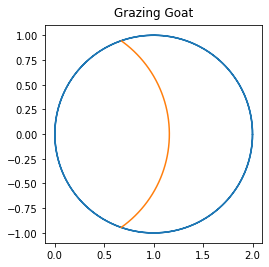

In [9]:
import numpy as np
import matplotlib.pyplot as plt


theta = np.arange(-np.pi,np.pi,0.01)  # Make a fine grid of theta values going once round the circle
r = 2*np.cos(theta)                   # The corresponding r values from the unit circle
x = [r[i]*np.cos(theta[i]) for i in range(len(theta))]
y = [r[i]*np.sin(theta[i]) for i in range(len(theta))]
beta = 0.303301*np.pi  # Found by calculator, in fact
C = np.sqrt(2 + 2*np.cos(2*beta))
theta = np.arange(-beta, beta, 0.01)
xgoat = [C*np.cos(theta[i]) for i in range(len(theta))]
ygoat = [C*np.sin(theta[i]) for i in range(len(theta))]
fig, ax = plt.subplots() 
ax.plot(x,y, xgoat, ygoat) 
ax.set_aspect('equal')
ax.set_title("Grazing Goat", va='bottom') # change the title
plt.show()

{ref}`[Go back to Activity] <RootfindingActivity-14>`